In [335]:
import os 
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [76]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skumar6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
from nltk.corpus import stopwords
from spacy.lang.en import English

stops = set(stopwords.words('english'))
print(type(stops))

<class 'set'>


In [88]:
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp = English()

In [78]:
def read_text_file(file_path):
    with open(file_path, 'r',encoding='utf-8',errors='ignore') as f:
        return f.read()

In [79]:
def parse_words(file_content):
    replaced_file_content = file_content.replace('\n','')
    replaced_file_content = replaced_file_content.replace(',','')
    replaced_file_content = replaced_file_content.replace(':','')
    return replaced_file_content.split(" ")

In [94]:
def populate_word_dict_freq(word_dictionary_frequency, words):
    for word in words:
#         if word in stops:
        if word.strip() =='' or nlp.vocab[word.strip()].is_stop==True:
            continue
        else:
            word_dictionary_frequency[word.strip()] = word_dictionary_frequency.get(word.strip(),1) + 1

In [159]:
os.chdir('../')

In [166]:
word_dictionary_frequency = {}
Y_train = []
os.chdir('./20_newsgroups')
doc_max_count = 750 # taking first 750 as training data
for doc_type_dir in os.listdir():
    print(doc_type_dir,end=" ")
    Y_train.append(doc_type_dir)
    dir_count+=1
    os.chdir('./'+doc_type_dir)
    doc_count = 0
    for doc in os.listdir():
        file_content = read_text_file(doc)
        words = parse_words(file_content)
        populate_word_dict_freq(word_dictionary_frequency, words)
        doc_count+=1
        if doc_count>=doc_max_count:
            break
    print(doc_count)
    doc_count=0
    os.chdir('../')
os.chdir('../')
Y_train = np.array(Y_train)

talk.politics.mideast 750
rec.autos 750
comp.sys.mac.hardware 750
alt.atheism 750
rec.sport.baseball 750
comp.os.ms-windows.misc 750
rec.sport.hockey 750
sci.crypt 750
sci.med 750
talk.politics.misc 750
rec.motorcycles 750
comp.windows.x 750
comp.graphics 750
comp.sys.ibm.pc.hardware 750
sci.electronics 750
talk.politics.guns 750
sci.space 750
soc.religion.christian 750
misc.forsale 750
talk.religion.misc 750


In [150]:
x = word_dictionary_frequency
sorted_vocab_dict = {k:v for k,v in sorted(x.items(),key=lambda item: item[1],reverse=True)}
# for k in sorted_vocab_dict.keys():
#     print(k,' ',sorted_vocab_dict[k])

In [187]:
words = sorted_vocab_dict.keys()
word_freq_v = sorted_vocab_dict.values()
word_freq = [f for f in word_freq]    

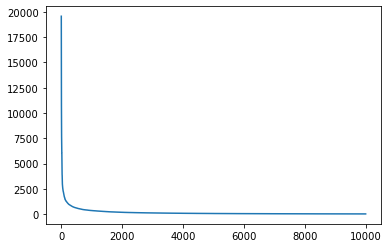

196

In [294]:
import matplotlib.pyplot as plt
plt.plot(word_freq[:10000])
plt.show()
word_freq[2000]

In [325]:
# choosing K as 1000 as per graph above
k = 1000
# features_words = [words[f] for f in range(k)]
# features_words

features = []
count = 0
for key in sorted_vocab_dict.keys():
    features.append(key)
    count+=1
    if count==k:
        break
# features

In [305]:
def populate_data(doc_global_count, data, words, features):
    for word in words:
        if word in features:
            # get feature index of word
            feature_index = features.index(word)
            data[doc_global_count][feature_index]+=1

In [264]:
os.chdir('../')

In [326]:
# computing X_train,Y_train,X_test,Y_test
X_train = np.array([[0 for i in range(k)] for j in range(750*20)])
Y_train = ["" for i in range(750*20)]
X_test = np.array([[0 for i in range(k)] for j in range(250*20)])
Y_test = ["" for i in range(250*20)]
os.chdir('./20_newsgroups')
train_test_split_limit = 750 # taking first 750 as training data
doc_global_train_count = 0
doc_global_test_count = 0
for doc_type_dir in os.listdir():
    print(doc_type_dir,end=" ")
    dir_count+=1
    os.chdir('./'+doc_type_dir)
    doc_count = 0
    for doc in os.listdir():
        file_content = read_text_file(doc)
        words = parse_words(file_content)
        if doc_count<train_test_split_limit:
            populate_data(doc_global_train_count,X_train, words,features)
            Y_train[doc_global_train_count] = doc_type_dir
            doc_global_train_count+=1
        else:
            populate_data(doc_global_test_count ,X_test, words,features)
            Y_test[doc_global_test_count] = doc_type_dir
            doc_global_test_count+=1
        doc_count+=1
    print(doc_count)
    doc_count=0
    os.chdir('../')
os.chdir('../')
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print("Data populated.")

talk.politics.mideast 1000
rec.autos 1000
comp.sys.mac.hardware 1000
alt.atheism 1000
rec.sport.baseball 1000
comp.os.ms-windows.misc 1000
rec.sport.hockey 1000
sci.crypt 1000
sci.med 1000
talk.politics.misc 1000
rec.motorcycles 1000
comp.windows.x 1000
comp.graphics 1000
comp.sys.ibm.pc.hardware 1000
sci.electronics 1000
talk.politics.guns 1000
sci.space 1000
soc.religion.christian 997
misc.forsale 1000
talk.religion.misc 1000
Data populated.


In [330]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(15000, 1000) (15000,) (5000, 1000) (5000,)


In [415]:
# save to CSV file
pd.DataFrame(X_train).to_csv("X_train.csv")
pd.DataFrame(Y_train).to_csv("Y_train.csv")
pd.DataFrame(X_test).to_csv("X_test.csv")
pd.DataFrame(Y_test).to_csv("Y_test.csv")

In [312]:
def fit(X_train, Y_train):
    result ={}
    class_values = set(Y_train)
    for c in class_values:
        result[c] = {}
        result["total_data"] = len(Y_train)
        current_class_rows = (Y_train == c)
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        num_features = X_train.shape[1]
        result[c]["total_count"] = len(Y_train_current)
        for j in range(1,num_features+1):
            result[c][j] = {}
            all_possible_values = set(X_train[:,j-1])
            for cur_value in all_possible_values:
                result[c][j][cur_value] = (X_train_current[:,j-1] == cur_value).sum()
    return result

def predictSinglePoint(dictionary,x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        if (current_class=="total_data"):
            continue
        p_current_class = probability(dictionary,x,current_class)
        if first_run == True or p_current_class > best_p:
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

def probability(dictionary,x,current_class):
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    num_features = len(dictionary[current_class].keys()) - 1
    for j in range(1,num_features+1):
        xj = x[j-1]
        count_current_class_with_value_xj = dictionary[current_class][j].get(xj,0) + 1
        count_current_class = dictionary[current_class]["total_count"] + len(dictionary[current_class][j].keys())
        current_xj_probability = np.log(count_current_class_with_value_xj) - np.log(count_current_class)
        output = output + current_xj_probability
    return output

def predict(dictionary, X_test):
    y_pred = []
    for x in X_test:
        x_class = predictSinglePoint(dictionary,x)
        y_pred.append(x_class)
    return y_pred

In [406]:
def convertStringToFloat(string):
    if string.strip()=='':
        return 0
    else:
        return float(string)

def parse_classification_report(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[3:-4]:
        row = {}
        row_data = line.split('      ')
        if len(row_data)<=1:
            continue
        index = 0
        while row_data[index].strip()=='':
            index+=1
        row['class'] = row_data[index].strip()
        row['precision'] = convertStringToFloat(row_data[index+1].strip())
        row['recall'] = convertStringToFloat(row_data[index+2].strip())
        row['f1_score'] = convertStringToFloat(row_data[index+3].strip())
        row['support'] = convertStringToFloat(row_data[index+4].strip())
        report_data.append(row)
        df = pd.DataFrame(report_data)
    return df

In [401]:
# fit and predict using own implementation
dictionary = fit(X_train,Y_train)
Y_own_pred = predict(dictionary,X_test)

In [407]:
#generate Confusion matrix for own implementation prediction for X_test
from sklearn.metrics import classification_report, confusion_matrix
own_implementation_report_data_frame = parse_classification_report(classification_report(Y_test,Y_own_pred,zero_division=1))
print(confusion_matrix(Y_test,Y_pred))
own_implementation_report_data_frame

[[  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0 201   2   2   3   2   0   6   3   3   7   0   1   0   0   1   1   2
    3   4   9]
 [  0   0  28  39  24  46  23  65   0   3   9   1   3   6   0   2   0   0
    0   0   1]
 [  0   0   2  81  36  51  16  52   0   1   3   1   4   2   0   1   0   0
    0   0   0]
 [  0   0   1   4 217   9   4  11   1   0   0   0   1   1   0   1   0   0
    0   0   0]
 [  0   0   2   1   6 226   0  12   0   0   0   0   0   1   1   0   0   1
    0   0   0]
 [  0   0   6  16  16  17 159  27   0   1   2   0   2   2   1   1   0   0
    0   0   0]
 [  0   0   3   4  13   8   1 200   3   3   8   0   1   5   0   0   0   0
    0   1   0]
 [  0   1   2   4   2   7   0  32 143  26  14   0   1   9   1   0   0   4
    0   2   2]
 [  0   3   0   0   1   1   0   8   4 226   2   0   1   1   0   0   0   2
    1   0   0]
 [  0   1   0   0   0   1   0   2   0   2 243   1   0   0   0   0   0   0
    0   0   0]
 [  0   1   0   0   0

,class,precision,recall,f1_score,support
0,alt.atheism,0.72,0.60,0.66,250.0
1,comp.graphics,0.72,0.32,0.44,250.0
2,comp.os.ms-windows.misc,0.55,0.66,0.60,250.0
3,comp.sys.ibm.pc.hardware,0.87,0.80,0.83,250.0
4,comp.sys.mac.hardware,0.84,0.82,0.83,250.0
5,comp.windows.x,0.86,0.70,0.77,250.0
6,misc.forsale,0.27,0.90,0.42,250.0
7,rec.autos,0.65,0.65,0.65,250.0
8,rec.motorcycles,0.70,0.86,0.77,250.0
9,rec.sport.baseball,0.93,0.87,0.90,250.0


In [410]:
# Predict and generate report using inbuilt SK Learn Gaussian Naive Base implementation
from sklearn.naive_bayes import GaussianNB
import re
from io import StringIO

clf = GaussianNB()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)



#txt report to df
report = classification_report(Y_test,Y_pred,zero_division=1)
report_df_inbuilt_implementation = parse_classification_report(report)
print(confusion_matrix(Y_test,Y_pred))
report_df_inbuilt_implementation

[[  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0 201   2   2   3   2   0   6   3   3   7   0   1   0   0   1   1   2
    3   4   9]
 [  0   0  28  39  24  46  23  65   0   3   9   1   3   6   0   2   0   0
    0   0   1]
 [  0   0   2  81  36  51  16  52   0   1   3   1   4   2   0   1   0   0
    0   0   0]
 [  0   0   1   4 217   9   4  11   1   0   0   0   1   1   0   1   0   0
    0   0   0]
 [  0   0   2   1   6 226   0  12   0   0   0   0   0   1   1   0   0   1
    0   0   0]
 [  0   0   6  16  16  17 159  27   0   1   2   0   2   2   1   1   0   0
    0   0   0]
 [  0   0   3   4  13   8   1 200   3   3   8   0   1   5   0   0   0   0
    0   1   0]
 [  0   1   2   4   2   7   0  32 143  26  14   0   1   9   1   0   0   4
    0   2   2]
 [  0   3   0   0   1   1   0   8   4 226   2   0   1   1   0   0   0   2
    1   0   0]
 [  0   1   0   0   0   1   0   2   0   2 243   1   0   0   0   0   0   0
    0   0   0]
 [  0   1   0   0   0

,class,precision,recall,f1_score,support
0,alt.atheism,0.53,0.80,0.64,250.0
1,comp.graphics,0.41,0.11,0.18,250.0
2,comp.os.ms-windows.misc,0.44,0.32,0.37,250.0
3,comp.sys.ibm.pc.hardware,0.63,0.87,0.73,250.0
4,comp.sys.mac.hardware,0.51,0.90,0.66,250.0
5,comp.windows.x,0.66,0.64,0.65,250.0
6,misc.forsale,0.35,0.80,0.49,250.0
7,rec.autos,0.60,0.57,0.58,250.0
8,rec.motorcycles,0.67,0.90,0.77,250.0
9,rec.sport.baseball,0.60,0.97,0.75,250.0


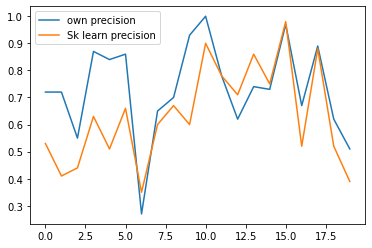

In [411]:
# Compare Own implementation and Sklearn inbuilt implementation result
plt.plot(own_implementation_report_data_frame.precision,label = "own precision")
plt.plot(report_df_inbuilt_implementation.precision,label = "Sk learn precision")
plt.legend()
plt.show()

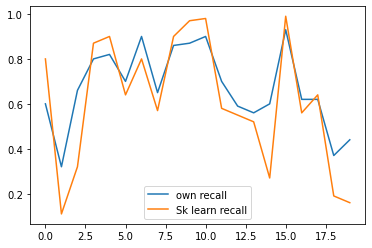

In [412]:
plt.plot(own_implementation_report_data_frame.recall,label = "own recall")
plt.plot(report_df_inbuilt_implementation.recall,label = "Sk learn recall")
plt.legend()
plt.show()

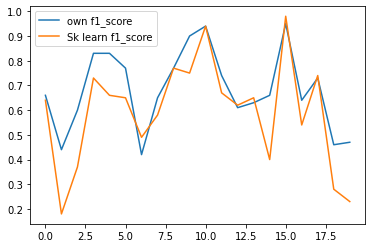

In [413]:
plt.plot(own_implementation_report_data_frame.f1_score,label = "own f1_score")
plt.plot(report_df_inbuilt_implementation.f1_score,label = "Sk learn f1_score")
plt.legend()
plt.show()

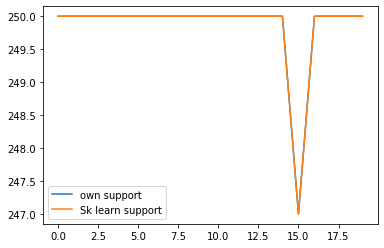

In [414]:
plt.plot(own_implementation_report_data_frame.support,label = "own support")
plt.plot(report_df_inbuilt_implementation.support,label = "Sk learn support")
plt.legend()
plt.show()

# Accuracy is slightly better in own implementation than SK learn but training time is bit more in own vs SK learn